### importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### data collection

In [2]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### data pre-processing

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.shape

(418, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### treating the missing values and dropping the extra columns

In [8]:
df=df.drop(['Cabin','PassengerId','Name','SibSp','Parch','Ticket','Fare'], axis=1)

In [9]:
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,34.5,Q
1,1,3,female,47.0,S
2,0,2,male,62.0,Q
3,0,3,male,27.0,S
4,1,3,female,22.0,S
...,...,...,...,...,...
413,0,3,male,NaN,S
414,1,1,female,39.0,C
415,0,3,male,38.5,S
416,0,3,male,NaN,S


In [10]:
df['Age'].replace([np.NaN], df['Age'].mean(), inplace=True)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,34.5,Q
1,1,3,female,47.0,S
2,0,2,male,62.0,Q
3,0,3,male,27.0,S
4,1,3,female,22.0,S


In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

### data visualisation

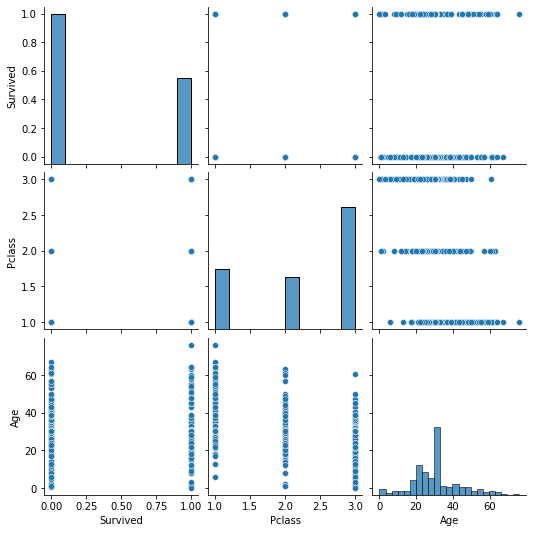

In [13]:
sns.pairplot(data=df)

In [14]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

/Users/aman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

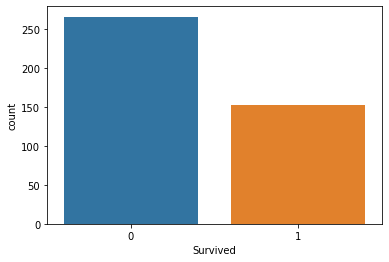

In [15]:
sns.countplot('Survived', data=df)

In [16]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

/Users/aman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

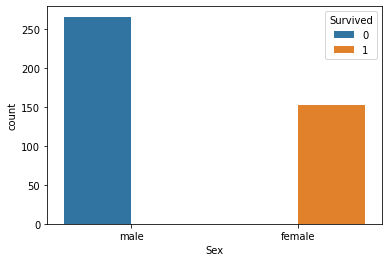

In [17]:
sns.countplot('Sex', hue='Survived', data=df)

/Users/aman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

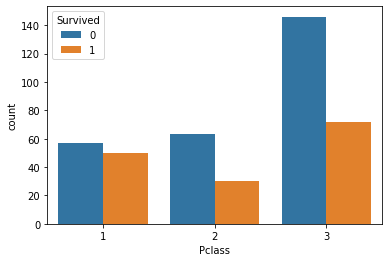

In [18]:
sns.countplot('Pclass', hue='Survived', data=df)

In [19]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

### changing string to integer values

In [20]:
df.replace({'Sex':{"male":0,"female":1}, 'Embarked':{"S":0,"C":1,"Q":2}}, inplace=True)

In [21]:
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,34.50000,2
1,1,3,1,47.00000,0
2,0,2,0,62.00000,2
3,0,3,0,27.00000,0
4,1,3,1,22.00000,0
...,...,...,...,...,...
413,0,3,0,30.27259,0
414,1,1,1,39.00000,1
415,0,3,0,38.50000,0
416,0,3,0,30.27259,0


### separating x and y variables

In [22]:
X=df.drop(['Survived'], axis=1)
y=df['Survived']

In [23]:
print(X.shape)
print(y.shape)

(418, 4)
(418,)


### split data into training and testing data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42) 
print('The shape of x_train :',X_train.shape)
print('The shape of x_test :',X_test.shape)
print('The shape of y_train :',y_train.shape)
print('The shape of y_test :',y_test.shape)

The shape of x_train : (334, 4)
The shape of x_test : (84, 4)
The shape of y_train : (334,)
The shape of y_test : (84,)


### train the model using LOGISTIC REGRESSION

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### make predictions

In [28]:
prediction = model.predict(X_test) 
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

### check accuracy

In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)

In [30]:
accuracy

1.0

### make confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix = confusion_matrix(y_test, prediction)

In [33]:
confusion_matrix

array([[50,  0],
       [ 0, 34]])

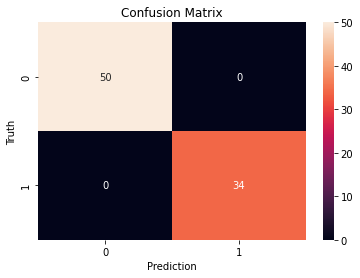

In [35]:
sns.heatmap(confusion_matrix, annot=True) 
plt.title("Confusion Matrix") 
plt.ylabel("Truth") 
plt.xlabel("Prediction") 
plt.show()

### evaluation/classification report

In [36]:
from sklearn.metrics import classification_report

In [37]:
classify = classification_report(y_test, prediction)

In [38]:
print("Classification Report:\n", classify)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



### taking inputs from the user and predicting the results

In [39]:
def predict_survival():
    pclass = int(input("Enter Pclass (1, 2, or 3): "))
    sex = int(input("Enter Sex (0 for male, 1 for female): "))
    age = float(input("Enter Age: "))
    embarked = int(input("Enter Embarked (0 for S, 1 for C, 2 for Q): "))
    new_data = {
        "Pclass": [pclass],
        "Sex": [sex],
        "Age": [age],
        "Embarked": [embarked]
    }
    new_df = pd.DataFrame(new_data)
    prediction = model.predict(new_df)[0]

    if prediction == 0:
        print("The passenger did not survive.")
    else:
        print("The passenger survived.")

In [40]:
predict_survival()

Enter Pclass (1, 2, or 3): 2
Enter Sex (0 for male, 1 for female): 0
Enter Age: 53.5
Enter Embarked (0 for S, 1 for C, 2 for Q): 0
The passenger did not survive.


In [41]:
predict_survival()

Enter Pclass (1, 2, or 3): 1
Enter Sex (0 for male, 1 for female): 1
Enter Age: 35
Enter Embarked (0 for S, 1 for C, 2 for Q): 2
The passenger survived.
